In [2]:
# load pandas
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point
NEIGHBORHOODS = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")

# load data
traffic_data = pd.read_csv('https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167', index_col="neighborhood",parse_dates=True)
traffic_data2 = pd.DataFrame(traffic_data)
traffic_data.head()
%matplotlib inline
import matplotlib.pyplot as plt
        

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
neighborhood,,,,,,,,,,,,,,,,,,,,,
Polish Hill,8,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,...,34.0,-79.964592,40.457119,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
Homewood South,1366,257117947,426,1.291196e+08,2021-06-15,2021-06-23,NaN,NaN,5,StatTrak,...,28.0,-79.895583,40.453386,9.0,13.0,42003130300,2.0,13.0,5.0,3-17
Lower Lawrenceville,232,276865270,227,2.030304e+09,2020-01-23,2020-01-31,334.0,NaN,6,StatTrak,...,31.0,-79.966403,40.465256,7.0,6.0,42003060300,2.0,6.0,2.0,3-3
Brookline,495,1193077063,290,1.857185e+08,2020-08-28,2020-09-08,567.0,NaN,NaN,StatTrak,...,30.0,-80.012936,40.389741,4.0,19.0,42003191800,5.0,19.0,6.0,4-26
Squirrel Hill South,1124,572121094,387,1.113141e+08,2021-04-15,2021-04-23,3891.0,NaN,2,StatTrak,...,32.0,-79.927678,40.433349,5.0,14.0,42003141300,3.0,14.0,4.0,2-21
South Side Flats,730,614417587,329,1.406278e+09,2020-12-03,2020-12-11,115.0,NaN,1,StatTrak,...,24.0,-79.981096,40.431002,3.0,17.0,42003170200,3.0,17.0,3.0,4-24
Squirrel Hill North,157,609406388,204,4.247410e+08,2019-11-14,2019-11-22,1390.0,NaN,2,StatTrak,...,27.0,-79.927978,40.445424,8.0,14.0,42003140200,3.0,14.0,4.0,2-17
Highland Park,55,1635967977,12,1.029659e+09,2019-12-12,2019-12-24,1080.0,NaN,16,StatTrak,...,36.0,-79.915532,40.471092,7.0,11.0,42003110600,2.0,11.0,5.0,3-9
Squirrel Hill South,893,1864843360,351,1.306424e+09,2021-02-02,2021-02-12,4821.0,NaN,2,StatTrak,...,36.0,-79.919198,40.430858,5.0,14.0,42003140800,3.0,14.0,4.0,2-21


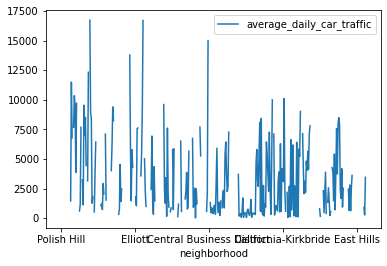

In [15]:
traffic_data.plot(y='average_daily_car_traffic')
traffic_data.sample(20)

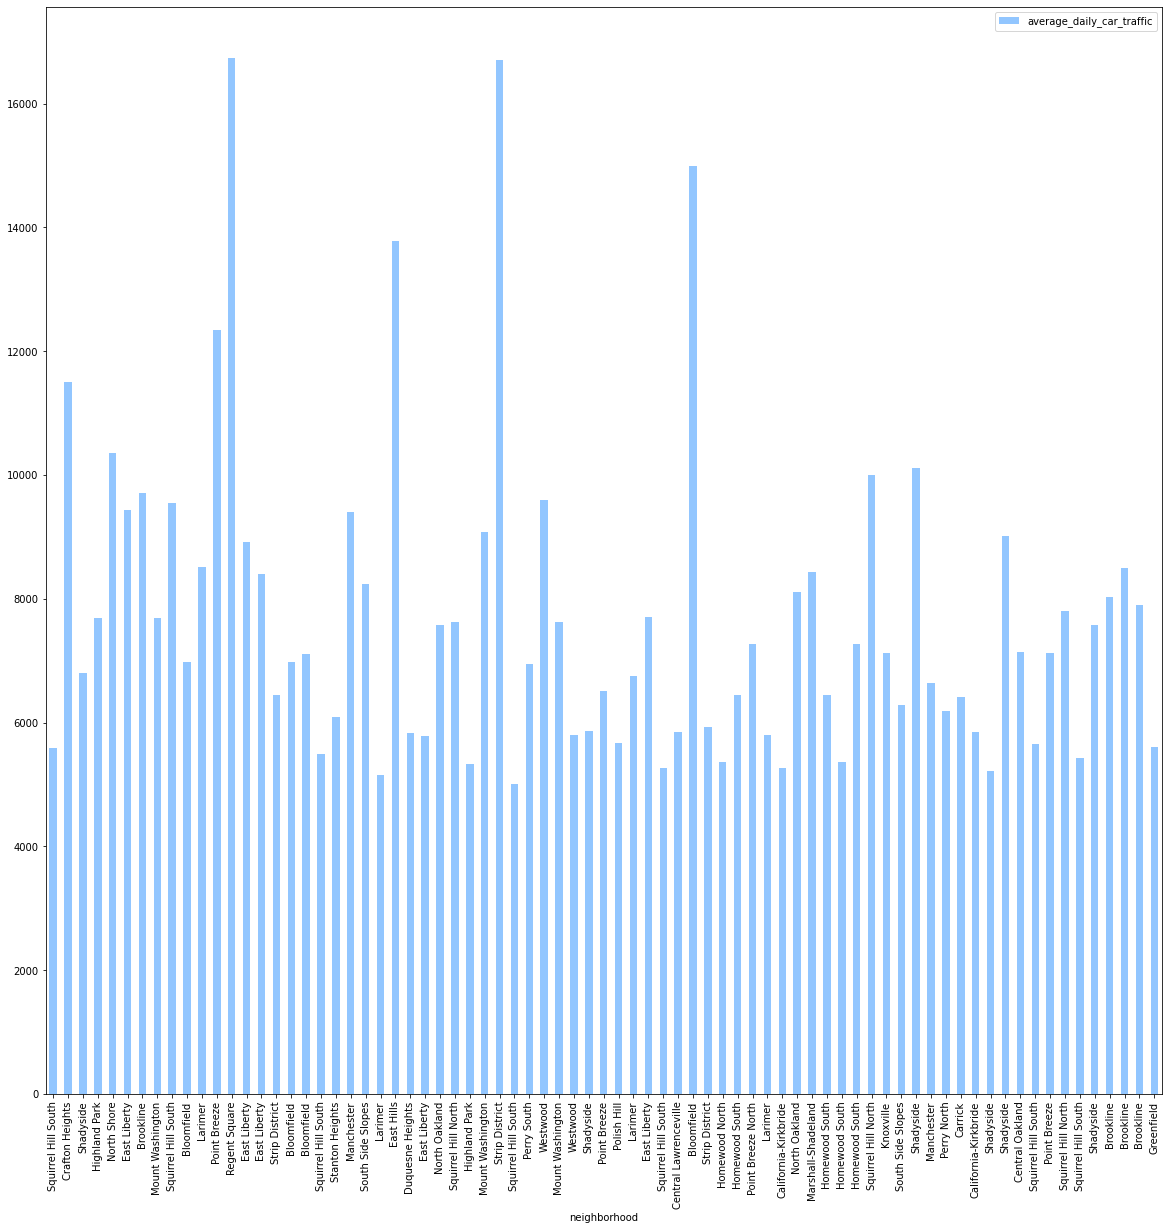

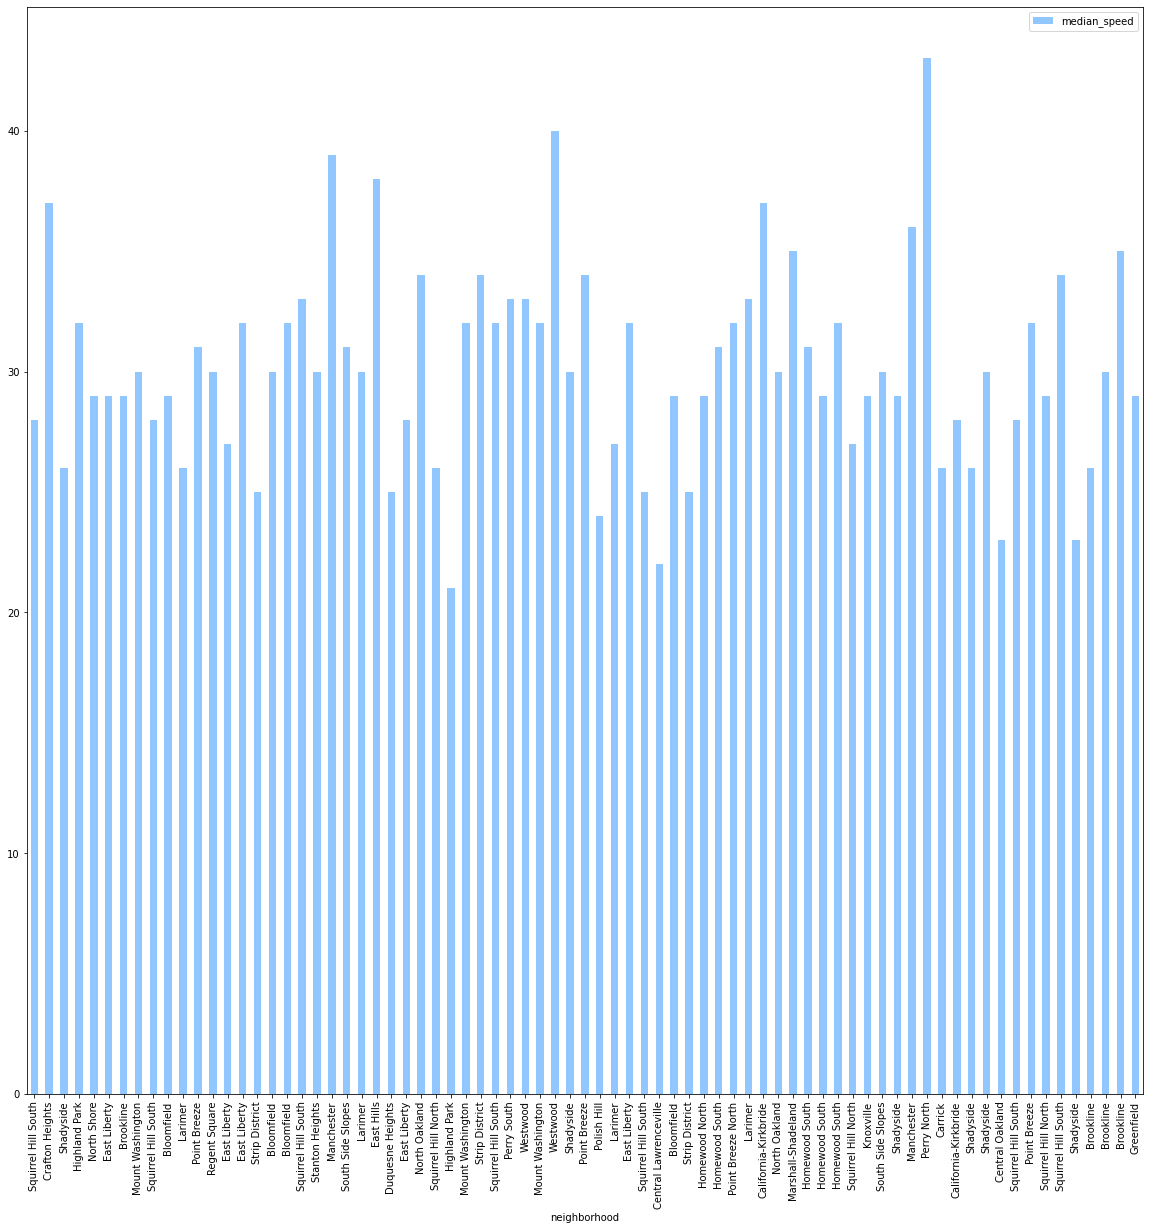

In [3]:
#query_mask = traffic_data['average_daily_car_traffic']!=nan
#graph = pd.DataFrame(columns=traffic_data['average_daily_car_traffic'],index=traffic_data['neighborhood'])
#graph.plot(kind='bar')
plt.style.use('seaborn-pastel')
query_mask = traffic_data['average_daily_car_traffic']>5000
stripped = traffic_data[query_mask]
stripped.plot(y='average_daily_car_traffic',kind='bar',figsize=(20,20))
stripped.plot(y='median_speed',kind='bar',figsize=(20,20))




Going off of these two plots, it looks like Regent Squar and Squirrel Hill south would both have more than dense enough traffic to prevent any emergency vehicles from reaching the scene until too late. 

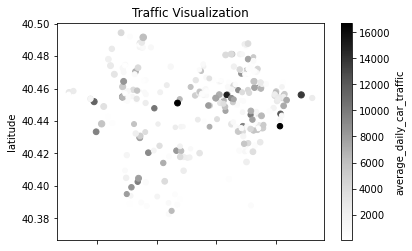

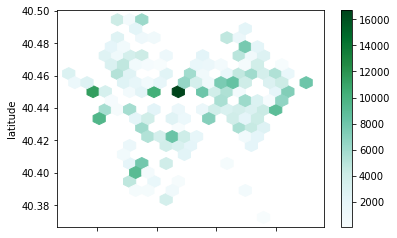

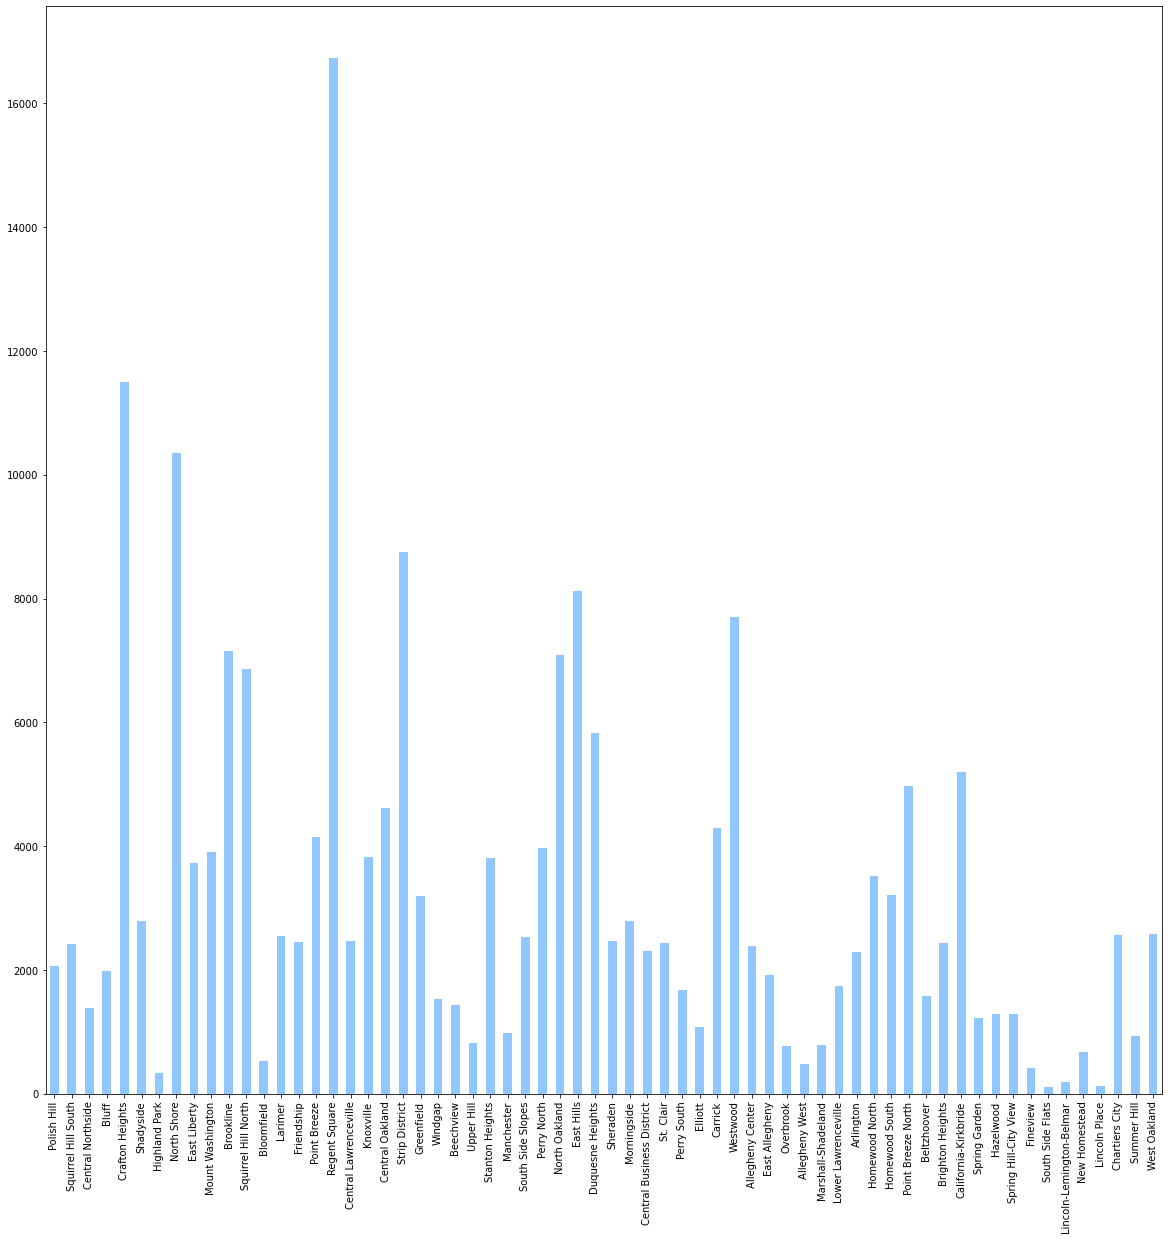

In [7]:
neighborhoods = {}
traffic_data2.dropna(subset = ['average_daily_car_traffic'], inplace=True)
for index, row in traffic_data2.iterrows():
    neighborhood = geo_to_neighborhood(row['latitude'],row['longitude'])
    if neighborhood in neighborhoods.keys():
        if row["average_daily_car_traffic"]=='NaN':
            i=4
        else:
           neighborhoods[neighborhood] = (neighborhoods[neighborhood]+row['average_daily_car_traffic'])/2
    elif neighborhood == None:
        i = 4
    else:
        if row["average_daily_car_traffic"]=='NaN':
            i=4
        else:
            neighborhoods[neighborhood]=row["average_daily_car_traffic"]

neighborhoodsDF = pd.DataFrame(neighborhoods,index=neighborhoods.keys())
neighborhoodsDF.mean().plot(kind='bar',figsize=(20,20))
#neighbhorhoods.plot(kind='bar')



In [5]:
def geo_to_neighborhood(latitude, longitude):
    """Converts a geolocation (latitude and longitude) to a Pittsburgh neighborhood name.

    Args:
        latitude (float): The latitude of the point.
        longitude (float): The longitude of the point.

    Returns:
        Union[str, None]: Name of the Pittsburgh neighborhood the point falls within or None if it does not fall within a neighborhood.
    """
    # Create a shapely point for the latitude and longitude
    pt = Point(longitude, latitude)
    # Loop through the neighborhoods
    for _idx, neighborhood in NEIGHBORHOODS.iterrows():
        # Check if this neighborhood contains the point
        if neighborhood["geometry"].contains(pt):
            # Return the name of the neighborhood
            return neighborhood["hood"]
    # Wasn't contained in the neighborhood
    return None

In [12]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
neighborhood,,,,,,,,,,,,,,,,,,,,,
Polish Hill,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,37.0,-79.967772,40.455733,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
Central Lawrenceville,2,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,...,NaN,-79.952249,40.466157,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
Windgap,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,...,41.0,-80.076469,40.460717,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
Squirrel Hill South,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,33.0,-79.914335,40.437379,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
Perry North,5,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-80.019211,40.490794,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [8]:
traffic_data.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [ ]:
neighborhoods = []
car_traffic = []
